In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:16pt;}
div.text_cell_render.rendered_html{font-size:16pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:16pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:16pt;padding:5px;}
table.dataframe{font-size:16px;}
</style>
"""))

# 1. 데이터 생성
- 남,여 키와 몸무게 데이터를 군집화

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
random.randint(140,195)

178

In [4]:
data = []
for i in range(50):
    # 여자 데이터 data추가
    data.append([random.randint(40, 70), random.randint(140, 170)])
    # 남자 데이터 data추가
    data.append([random.randint(60, 95), random.randint(160, 195)])
#data

In [5]:

# 여자
# for female in data[::2]:
#     print(female, end=' ')
# print('여자 : ', [female for female in data[::2]])
# print('남자 : ', [male for male in data[1::2]])
print('====================================================')
print('여자 몸무게(x축) :',  [female[0] for female in data[::2]] )
print('여자 키(y축) :',  [female[1] for female in data[::2]] )

print('남자 몸무게(x축) : ', [male[0] for male in data[1::2]])
print('남자 키(y축) : ', [male[1] for male in data[1::2]])

여자 몸무게(x축) : [43, 48, 59, 43, 57, 58, 65, 64, 40, 46, 67, 55, 53, 66, 68, 52, 69, 52, 51, 63, 62, 56, 43, 68, 56, 58, 59, 69, 40, 64, 70, 63, 70, 63, 61, 43, 63, 64, 60, 66, 56, 63, 61, 60, 48, 69, 46, 52, 50, 54]
여자 키(y축) : [150, 158, 149, 162, 156, 147, 164, 148, 143, 151, 149, 145, 148, 143, 165, 149, 146, 149, 146, 168, 155, 148, 146, 157, 164, 152, 145, 157, 169, 159, 159, 140, 141, 151, 152, 165, 170, 165, 147, 160, 154, 143, 150, 155, 167, 157, 140, 146, 155, 143]
남자 몸무게(x축) :  [68, 95, 66, 70, 83, 88, 95, 68, 72, 86, 74, 76, 86, 75, 86, 92, 67, 68, 85, 89, 78, 77, 61, 77, 89, 85, 88, 81, 88, 87, 77, 81, 91, 95, 73, 89, 83, 61, 81, 88, 88, 84, 75, 84, 94, 69, 84, 84, 72, 86]
남자 키(y축) :  [182, 172, 166, 162, 172, 165, 175, 175, 180, 195, 187, 189, 161, 172, 179, 165, 169, 177, 167, 192, 178, 176, 164, 174, 191, 180, 166, 191, 169, 170, 188, 167, 184, 176, 163, 162, 169, 180, 173, 192, 162, 191, 177, 170, 176, 171, 160, 173, 191, 176]


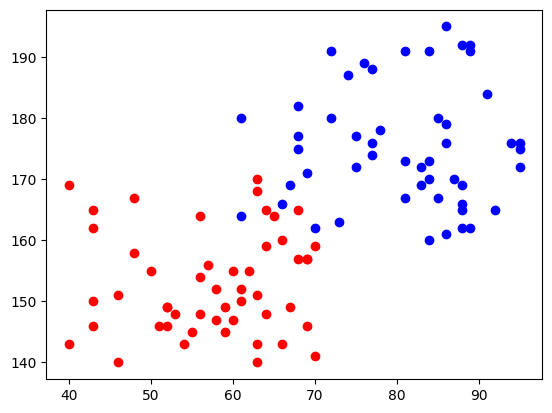

In [6]:
plt.plot([female[0] for female in data[::2]], 
        [female[1] for female in data[::2]], 'o', color='r')
plt.plot([male[0] for male in data[1::2]],
        [male[1] for male in data[1::2]], 'o', color='b')
plt.show()

# 2. 군집화 로직

In [20]:
# 초기 랜덤 지점 2개
random_points = [
    [random.randint(40,95), random.randint(140,195)],
    [random.randint(40,95), random.randint(140,195)]
]
random_points

[[57, 160], [78, 194]]

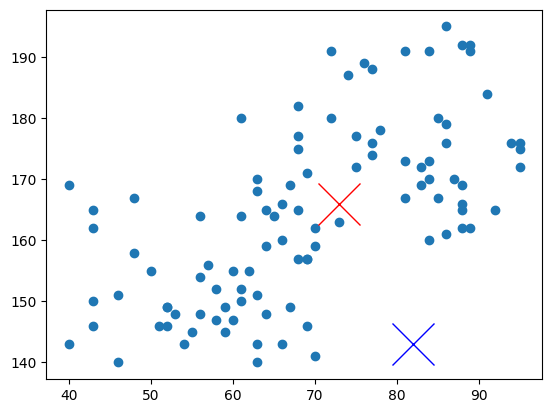

In [9]:
plt.plot([d[0] for d in data],
        [d[1] for d in data], 'o')
plt.plot(random_points[0][0],
        random_points[0][1], 'x', color='r', markersize=30) # 기준점0
plt.plot(random_points[1][0],
        random_points[1][1], 'x', color='b', markersize=30) # 기준점1

In [10]:
# 두 점 거리를 return / a : [0,0]
def dist(a, b):
    return np.sqrt( (a[0]-b[0])**2 + (a[1]-b[1])**2)
dist([3,4], [0,0])

5.0

In [11]:
# random_points[0]에 가까운 그룹과 random_points[1]에 가까운 그룹을 분류
group0 = []
group1 = []
for d in data:
    if dist(random_points[0], d) < dist(random_points[1], d):
        group0.append(d)
    else:
        group1.append(d)
len(group0), len(group1)

(88, 12)

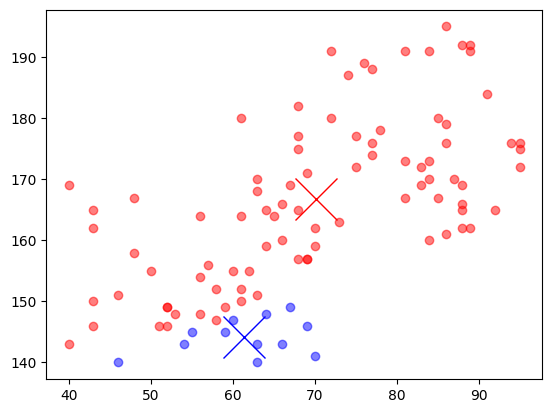

In [22]:
# group0과 group1, 기준점0, 기준점1
plt.plot([d[0] for d in group0],
         [d[1] for d in group0], 'o', color='r', alpha=0.5)
plt.plot(random_points[0][0], random_points[0][1], 'x', color='r', markersize=30)
plt.plot([d[0] for d in group1],
         [d[1] for d in group1], 'o', color='b', alpha=0.5)
plt.plot(random_points[1][0], random_points[1][1], 'x', color='b', markersize=30)

In [23]:
# 기준점 이동 : group0의 중심점(기준점0), group1의 중심점(기준점1)
group0_meanX = np.mean([d[0] for d in group0])
group0_meanY = np.mean([d[1] for d in group0])
random_points[0] = [group0_meanX, group0_meanY]

group1_meanX = np.mean([d[0] for d in group1])
group1_meanY = np.mean([d[1] for d in group1])
random_points[1] = [group1_meanX, group1_meanY]
random_points

[[70.2159090909091, 166.8181818181818],
 [61.333333333333336, 144.16666666666666]]

# 3. 군집화 전체 코드(for문 이용)
- 랜덤포인트 2개 지정
- for문
    * 랜덤포인트 2지점 기준으로 group0과 1 나눔
    * 랜덤포인트 출력
    * group0의 중간점과 1의 중간점을 랜덤포인트로 업데이트

초기 기준점 : [[86, 171], [83, 192]]
1 번째 points : [[67.52325581395348, 160.19767441860466], [79.14285714285714, 188.07142857142858]]
2 번째 points : [[63.0735294117647, 156.38235294117646], [82.0625, 180.5]]
3 번째 points : [[58.607142857142854, 154.33928571428572], [82.56818181818181, 176.52272727272728]]
4 번째 points : [[58.148148148148145, 153.87037037037038], [82.06521739130434, 176.1086956521739]]
5 번째 points : [[57.9811320754717, 153.58490566037736], [81.74468085106383, 175.95744680851064]]
6 번째 points : [[57.9811320754717, 153.58490566037736], [81.74468085106383, 175.95744680851064]]
7 번째 points : [[57.9811320754717, 153.58490566037736], [81.74468085106383, 175.95744680851064]]
8 번째 points : [[57.9811320754717, 153.58490566037736], [81.74468085106383, 175.95744680851064]]
9 번째 points : [[57.9811320754717, 153.58490566037736], [81.74468085106383, 175.95744680851064]]


(140.0, 195.0)

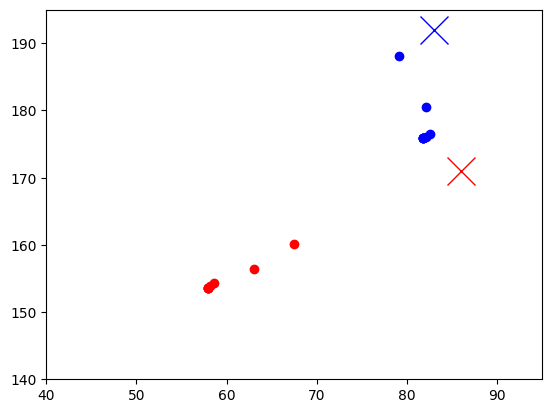

In [33]:
points = [
    [random.randint(40, 95), random.randint(140,195)],
    [random.randint(40, 95), random.randint(140,195)],
]
print('초기 기준점 :', points)
plt.plot(points[0][0], points[0][1], 'x', color='r', markersize=20)
plt.plot(points[1][0], points[1][1], 'x', color='b', markersize=20)
for i in range(1, 10):
    # 포인트 2지점 기준으로 group0과 group1나눔
    group0 = []
    group1 = []
    for d in data:
        if dist(d, points[0]) < dist(d, points[1]):
            group0.append(d)
        else:
            group1.append(d)
        
    # group0의 중간점, group1의 중간점으로 points 업데이트
    group0_mean_X = np.mean([d[0] for d in group0])
    group0_mean_Y = np.mean([d[1] for d in group0])
    points[0] = [group0_mean_X, group0_mean_Y]
    group1_mean_X = np.mean([d[0] for d in group1])
    group1_mean_Y = np.mean([d[1] for d in group1])
    points[1] = [group1_mean_X, group1_mean_Y]
    
    # 포인트 출력
    print(i, '번째 points :', points)
    plt.plot(points[0][0], points[0][1], 'o', color='r')
    plt.plot(points[1][0], points[1][1], 'o', color='b')
plt.xlim([40,95])
plt.ylim([140,195])

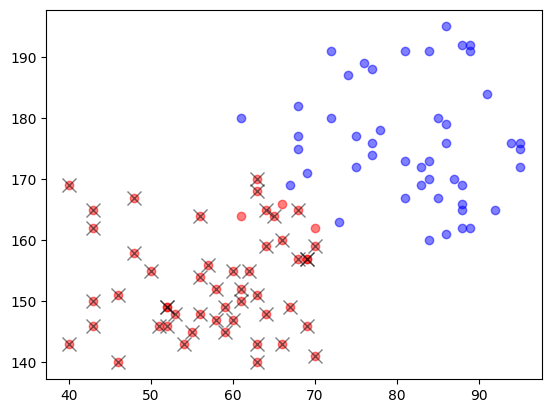

In [34]:
plt.plot([d[0] for d in group0],
         [d[1] for d in group0], 'o', color='r', alpha=0.5)
plt.plot([d[0] for d in group1],
         [d[1] for d in group1], 'o', color='b', alpha=0.5)
plt.plot([d[0] for d in data[::2]],
         [d[1] for d in data[::2]], 'x', color='k', alpha=0.5, markersize=10)

# 4. api(sklearn)를 이용한 군집화
- sklearn : 머신러닝 패키지
    - 예측모델 : 분류, 회귀, 군집분석 - fit(학습), predict(예측-분류/회귀)
    - 변환모델 : 전처리시 사용 ex. 인코딩, 스케일조정 - fit(학습), transform(변환함수), fit_transform(학->변)

In [ ]:
# 군집분석 라이브러리가 경고 메세지 출력할 경우
# import os
# os.environ['OMP_NUM_THREADS'] = '1'

In [39]:
from sklearn.cluster import KMeans
data = np.array(data)
model = KMeans(n_clusters=2, # 2개 그룹으로 군집
              init='random', # 초기 기준점을 random하게
              n_init=10, # 10번 실행
              random_state=7) # random 결과를 일관적으로 맞추기 위한 seed
model.fit(data)

KMeans(init='random', n_clusters=2, n_init=10, random_state=7)

In [37]:
# 기준점(중심점)
model.cluster_centers_

array([[ 81.74468085, 175.95744681],
       [ 57.98113208, 153.58490566]])

In [38]:
# 나눠진 그릅들의 인덱스
model.labels_

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

In [40]:
group0 = data[model.labels_==0]
group1 = data[model.labels_==1]

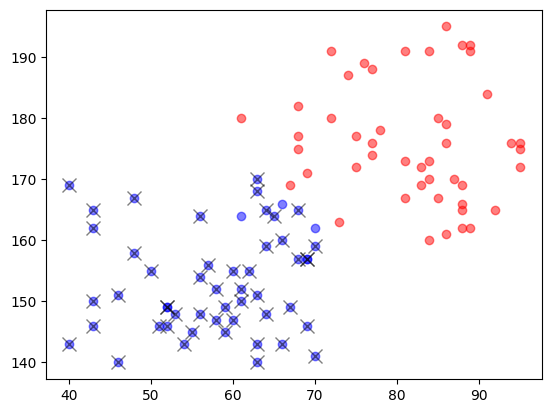

In [41]:
plt.plot([d[0] for d in group0],
         [d[1] for d in group0], 'o', color='r', alpha=0.5)
plt.plot([d[0] for d in group1],
         [d[1] for d in group1], 'o', color='b', alpha=0.5)
plt.plot([d[0] for d in data[::2]],
         [d[1] for d in data[::2]], 'x', color='k', alpha=0.5, markersize=10)